In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

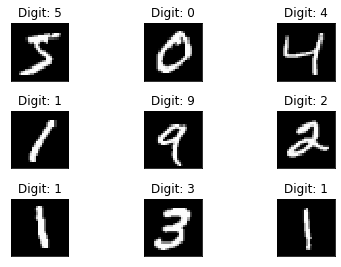

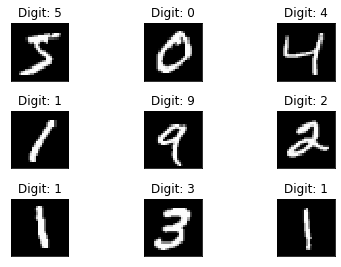

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

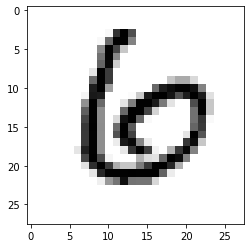

In [3]:
plt.imshow(X_test[11], cmap=plt.cm.binary)

Normalización de los datos de entrada

In [4]:
 X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(9984, 28, 28)

In [9]:
X_train = X_train[0:59904,:]
X_test = X_test[0:9984,:]
y_train = y_train[0:59904]
y_test = y_test[0:9984]

In [10]:
X_train.shape[0]

59904

In [11]:
num_clases=10
img_rows, img_cols=28,28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test/ 255.0

print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (59904, 28, 28, 1)


In [15]:
# convertir vectores de clase en matrices de clase binaria
num_category=10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

Construcción del modelo

In [16]:
model = Sequential()
#1 capa convolucional con activación de unidad lineal rectificada
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 filtros de convolución usados cada uno de tamaño 3x3
#se elige las mejores características a través de la agrupación
model.add(MaxPooling2D(pool_size=(2, 2)))
#2 capa convolucional con activación de unidad lineal rectificada
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#64 filtros de convolución usados cada uno de tamaño 3x3
#se elige las mejores características a través de la agrupación
model.add(MaxPooling2D(pool_size=(2, 2)))
#aplanar ya que hay demasiadas dimensiones, solo queremos una salida de clasificación
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#activa y desactiva las neuronas al azar para mejorar la convergencia
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Verificar la disponibilidad de GPU

In [14]:
nombre_gpu = tf.test.gpu_device_name()
if nombre_gpu != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('GPU encontrada: {}'.format(nombre_gpu))

GPU encontrada: /device:GPU:0


In [23]:
batch_size = 128
num_epoch = 50
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
468/468 [==============================] - 2s 4ms/step - loss: 2.0036 - accuracy: 0.4540 - val_loss: 1.9520 - val_accuracy: 0.6649
Epoch 2/50
468/468 [==============================] - 2s 3ms/step - loss: 1.9547 - accuracy: 0.4756 - val_loss: 1.8946 - val_accuracy: 0.6833
Epoch 3/50
468/468 [==============================] - 2s 3ms/step - loss: 1.9030 - accuracy: 0.4883 - val_loss: 1.8326 - val_accuracy: 0.6997
Epoch 4/50
468/468 [==============================] - 2s 3ms/step - loss: 1.8441 - accuracy: 0.5072 - val_loss: 1.7661 - val_accuracy: 0.7166
Epoch 5/50
468/468 [==============================] - 2s 3ms/step - loss: 1.7850 - accuracy: 0.5249 - val_loss: 1.6964 - val_accuracy: 0.7317
Epoch 6/50
468/468 [==============================] - 2s 3ms/step - loss: 1.7276 - accuracy: 0.5394 - val_loss: 1.6249 - val_accuracy: 0.7437
Epoch 7/50
468/468 [==============================] - 2s 3ms/step - loss: 1.6657 - accuracy: 0.5522 - val_loss: 1.5524 - val_accuracy: 0.7540
Epoch 

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.3895261585712433
Test accuracy: 0.9003405570983887


In [25]:
predictions = model.predict(X_test)

In [26]:
import numpy as np
np.argmax(predictions[11])

6